In [49]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# [Term project: 서울특별시의 전기차 통계 데이터를 분석하여 의미있는 가치를 도출한다]

In [50]:
#서울특별시 자치구별 전기차 용도별 등록현황 데이터 분석

df = pd.read_csv('C:/Users/test4/Desktop/대학 강의/2-2/데이터처리프로그래밍/dataset/서울특별시_자치구별 전기차 용도별 등록현황.csv', encoding='cp949')
df.head(10)

,연월별,시군구별,연료별,용도별,승 용,승 합,화 물,특 수,계
0,2017-12-31,종로구,전기,비사업용,73,0,2,0,75
1,2017-12-31,중 구,전기,비사업용,106,1,2,0,109
2,2017-12-31,중 구,전기,사업용,1,0,0,0,1
3,2017-12-31,용산구,전기,비사업용,67,0,0,0,67
4,2017-12-31,성동구,전기,비사업용,85,0,1,0,86
5,2017-12-31,성동구,전기,사업용,109,0,0,0,109
6,2017-12-31,광진구,전기,비사업용,43,0,0,0,43
7,2017-12-31,광진구,전기,사업용,1,0,0,0,1
8,2017-12-31,동대문구,전기,비사업용,45,0,1,0,46
9,2017-12-31,동대문구,전기,사업용,3,0,0,0,3


In [51]:
df.columns

Index(['연월별', '시군구별', '연료별', '용도별', '승    용', '승    합', '화    물', '특    수',
       '계'],
      dtype='object')

## 연도별 전기자동차의 통계 데이터를 활용

In [52]:
#날짜를 연도별로만 간결하게 정리

df['연도'] = df['연월별'].str[:4]

df = df.drop('연월별', axis=1)

df.head(10)

,시군구별,연료별,용도별,승 용,승 합,화 물,특 수,계,연도
0,종로구,전기,비사업용,73,0,2,0,75,2017
1,중 구,전기,비사업용,106,1,2,0,109,2017
2,중 구,전기,사업용,1,0,0,0,1,2017
3,용산구,전기,비사업용,67,0,0,0,67,2017
4,성동구,전기,비사업용,85,0,1,0,86,2017
5,성동구,전기,사업용,109,0,0,0,109,2017
6,광진구,전기,비사업용,43,0,0,0,43,2017
7,광진구,전기,사업용,1,0,0,0,1,2017
8,동대문구,전기,비사업용,45,0,1,0,46,2017
9,동대문구,전기,사업용,3,0,0,0,3,2017


In [53]:
df.isnull().sum()

시군구별      0
연료별       0
용도별       0
승    용    0
승    합    0
화    물    0
특    수    0
계         0
연도        0
dtype: int64

In [54]:
cnt = df['용도별'].value_counts()
cnt

비사업용    150
사업용     142
Name: 용도별, dtype: int64

### *전기자동차를 용도별로 나누어 EDA 시행 후 분석

Text(0.5, 1.0, 'Label')

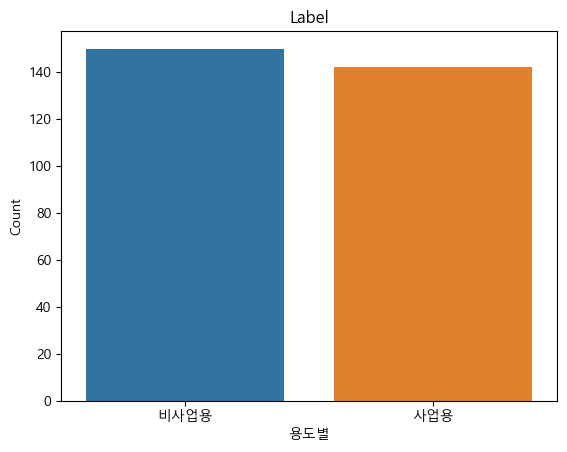

In [55]:
sns.countplot(data = df, x="용도별")
plt.xlabel("용도별")
plt.ylabel("Count")
plt.title("Label")

In [56]:
cnt = df.groupby('시군구별')['계'].sum().reset_index()
cnt

,시군구별,계
0,강남구,45033
1,강동구,4262
2,강북구,1783
3,강서구,5639
4,관악구,2638
5,광진구,2063
6,구로구,9390
7,금천구,2309
8,노원구,3105
9,도봉구,2172


In [57]:
cnt = df.groupby('연도')['계'].sum().reset_index()
cnt

,연도,계
0,2017,4797
1,2018,9564
2,2019,14952
3,2020,23393
4,2021,40564
5,2022,49590


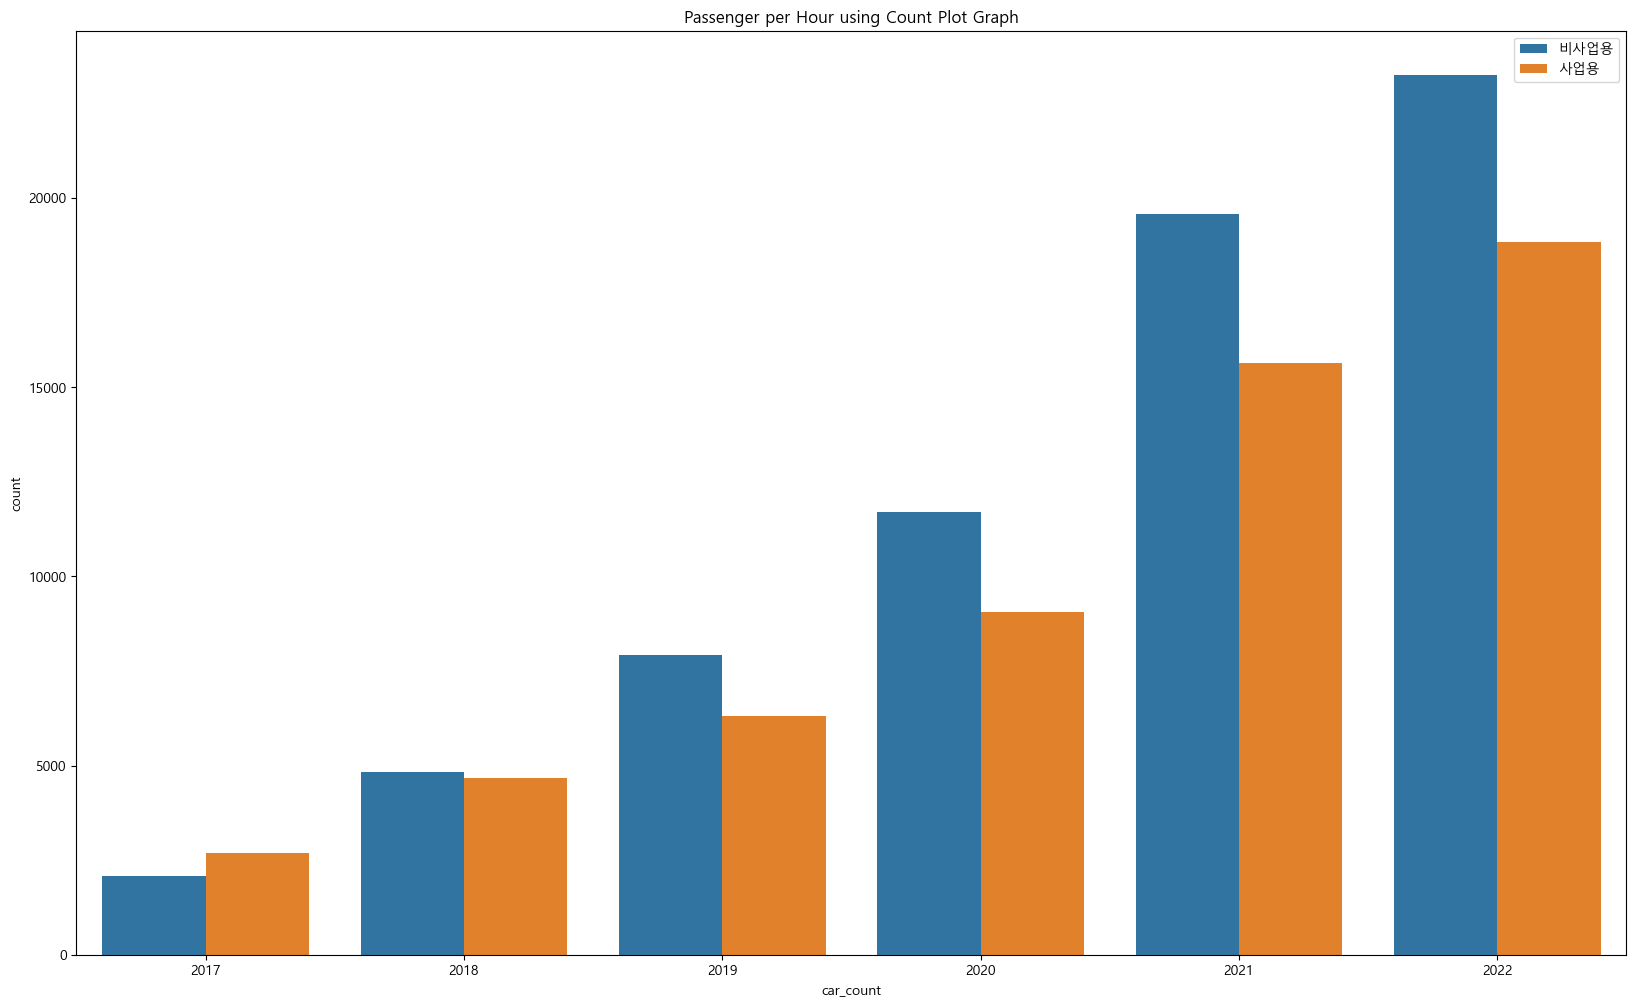

In [58]:
car_count_sum = df.groupby(['연도','용도별'])['승    용'].sum().reset_index()

plt.figure(figsize=(20, 12))
sns.barplot(x='연도', y='승    용', hue='용도별', data = car_count_sum)

plt.xlabel('car_count')
plt.ylabel('count')
plt.title('Passenger per Hour using Count Plot Graph')
plt.legend()
plt.show()

### *알 수 있는 점: 2017년도 이후로 비사업용 전기차의 수가 사업용보다 늘어나고, 그 격차가 늘어나고 있다.

## => 민간인들이 전기자동차를 일상용으로 구매하는 비율이 증가함.

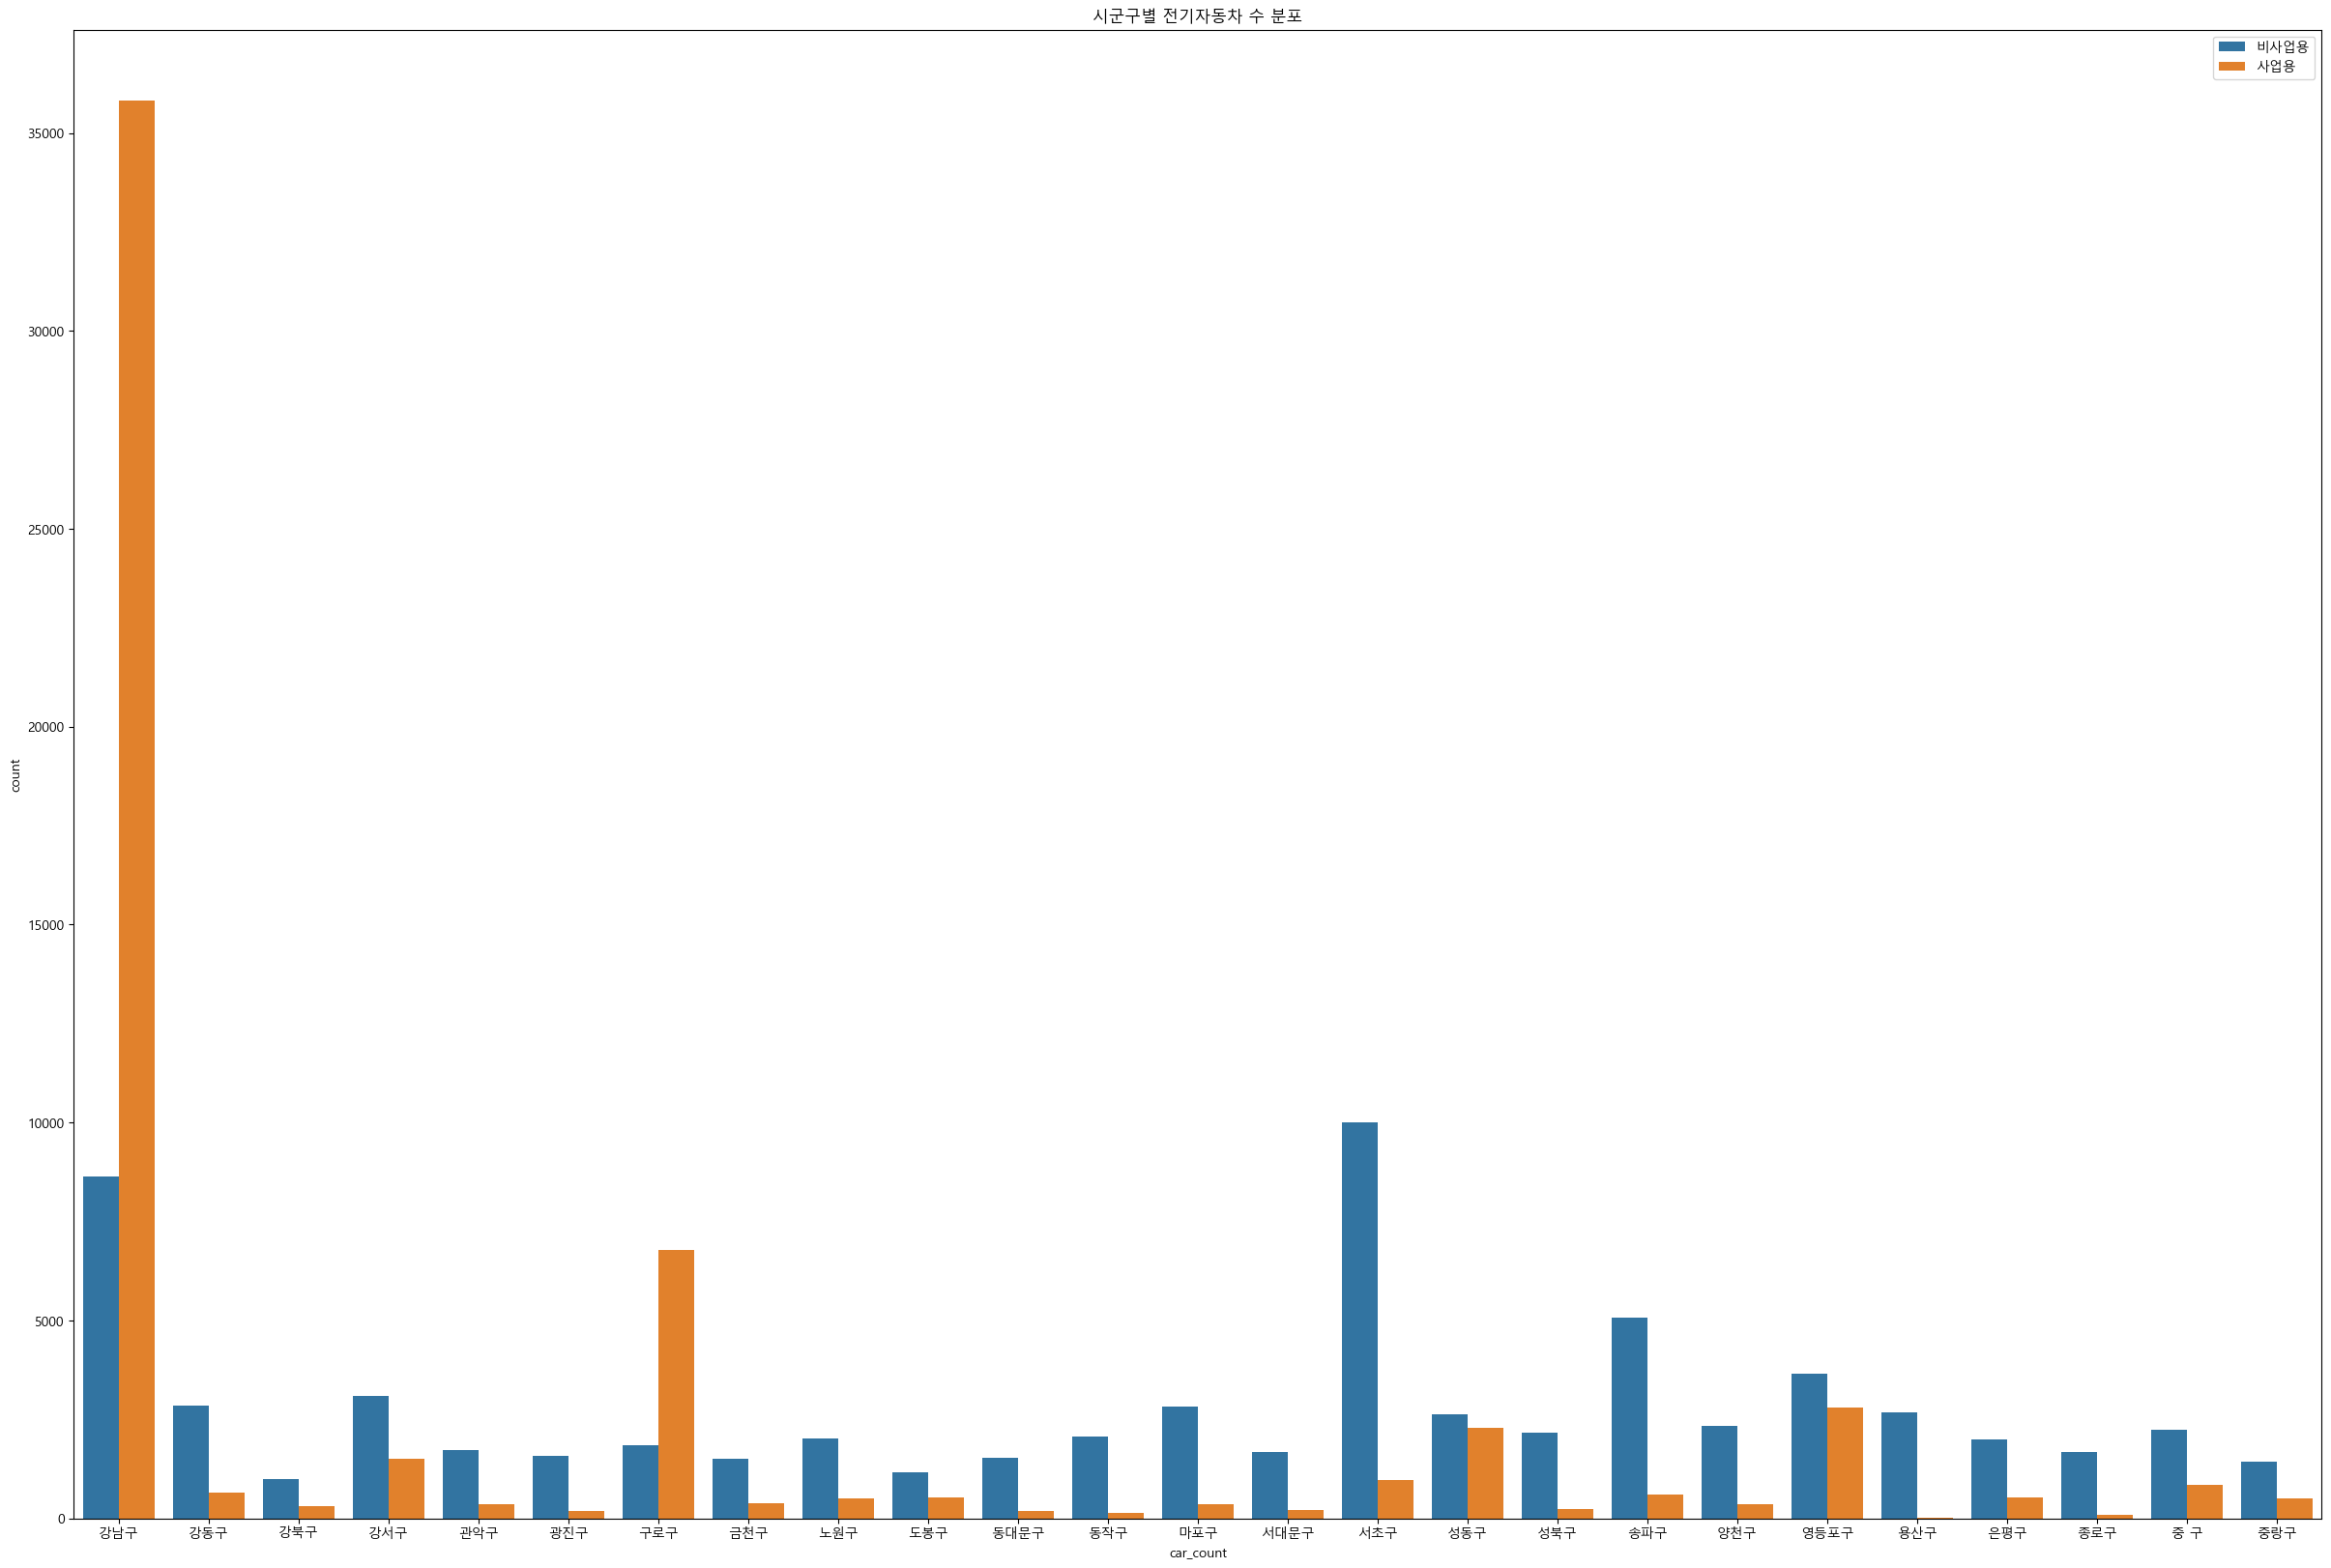

In [59]:
car_count_sum = df.groupby(['시군구별','용도별'])['승    용'].sum().reset_index()

plt.figure(figsize=(30, 20))
sns.barplot(x='시군구별', y='승    용', hue='용도별', data = car_count_sum)

plt.xlabel('car_count')
plt.ylabel('count')
plt.title('시군구별 전기자동차 수 분포')
plt.legend()
plt.show()

array([[<AxesSubplot:title={'center':'승    용'}>,
        <AxesSubplot:title={'center':'승    합'}>,
        <AxesSubplot:title={'center':'화    물'}>,
        <AxesSubplot:title={'center':'특    수'}>,
        <AxesSubplot:title={'center':'계'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

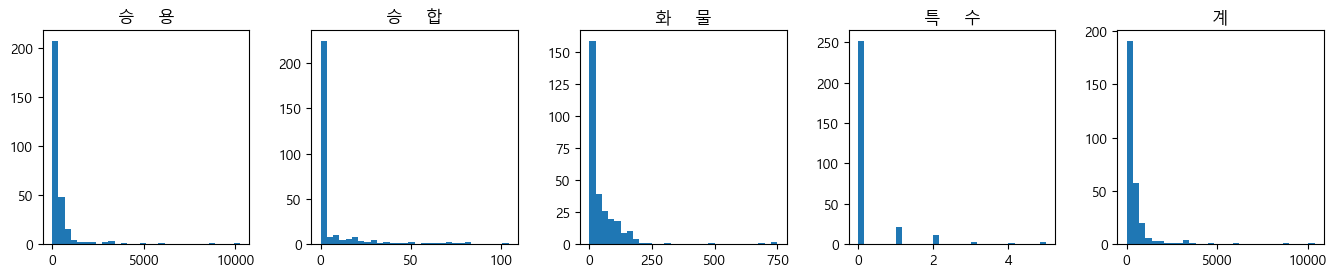

In [60]:
df.hist(figsize=(20,10), grid=False, layout=(3, 6), bins = 30)

### *알 수 있는 점: 강남구와 서초구에 전기자동차 분포가 밀집되어 있다. 또한 구로구에서 사업용 전기자동차 수가 많이 나타나고 있다. 공통적으로 서울에서 가장 소득 수준이 높은 지역들이고, 각종 회사, 기업 단지가 발달한 곳이다.

## => 자산, 기업 단지 규모에 따라 전기자동차 도입과 분포가 발달함.

<AxesSubplot:>

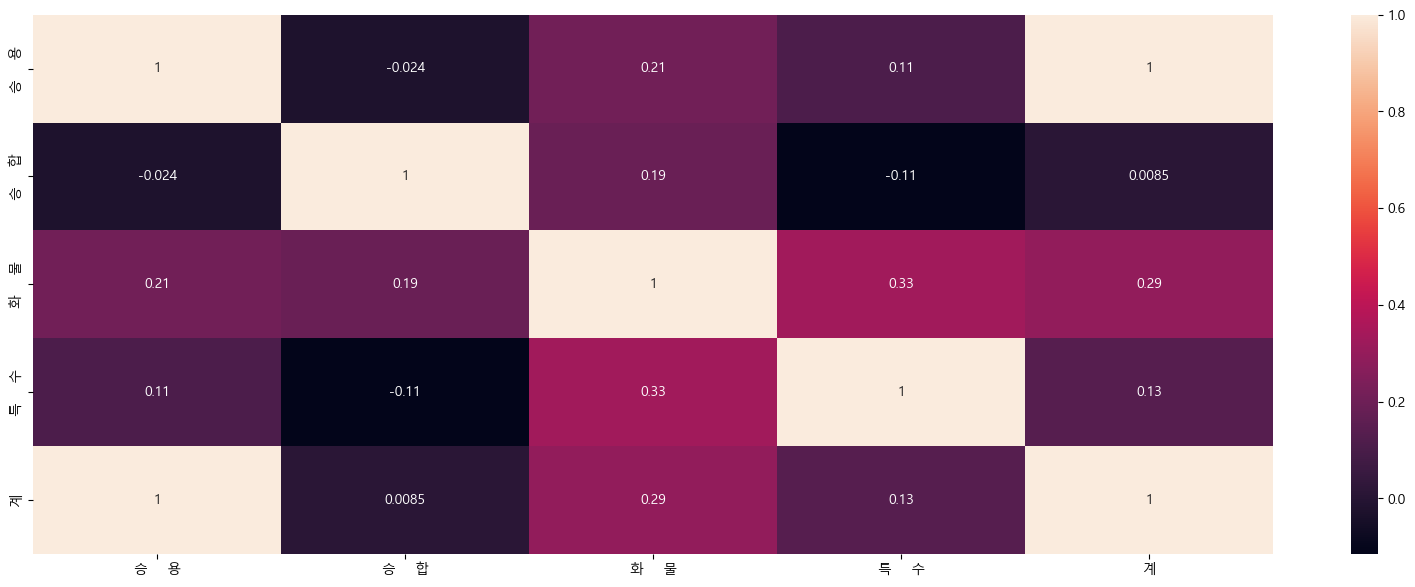

In [61]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

### *각종 그래프를 통해 요소 간 상관관계 분석

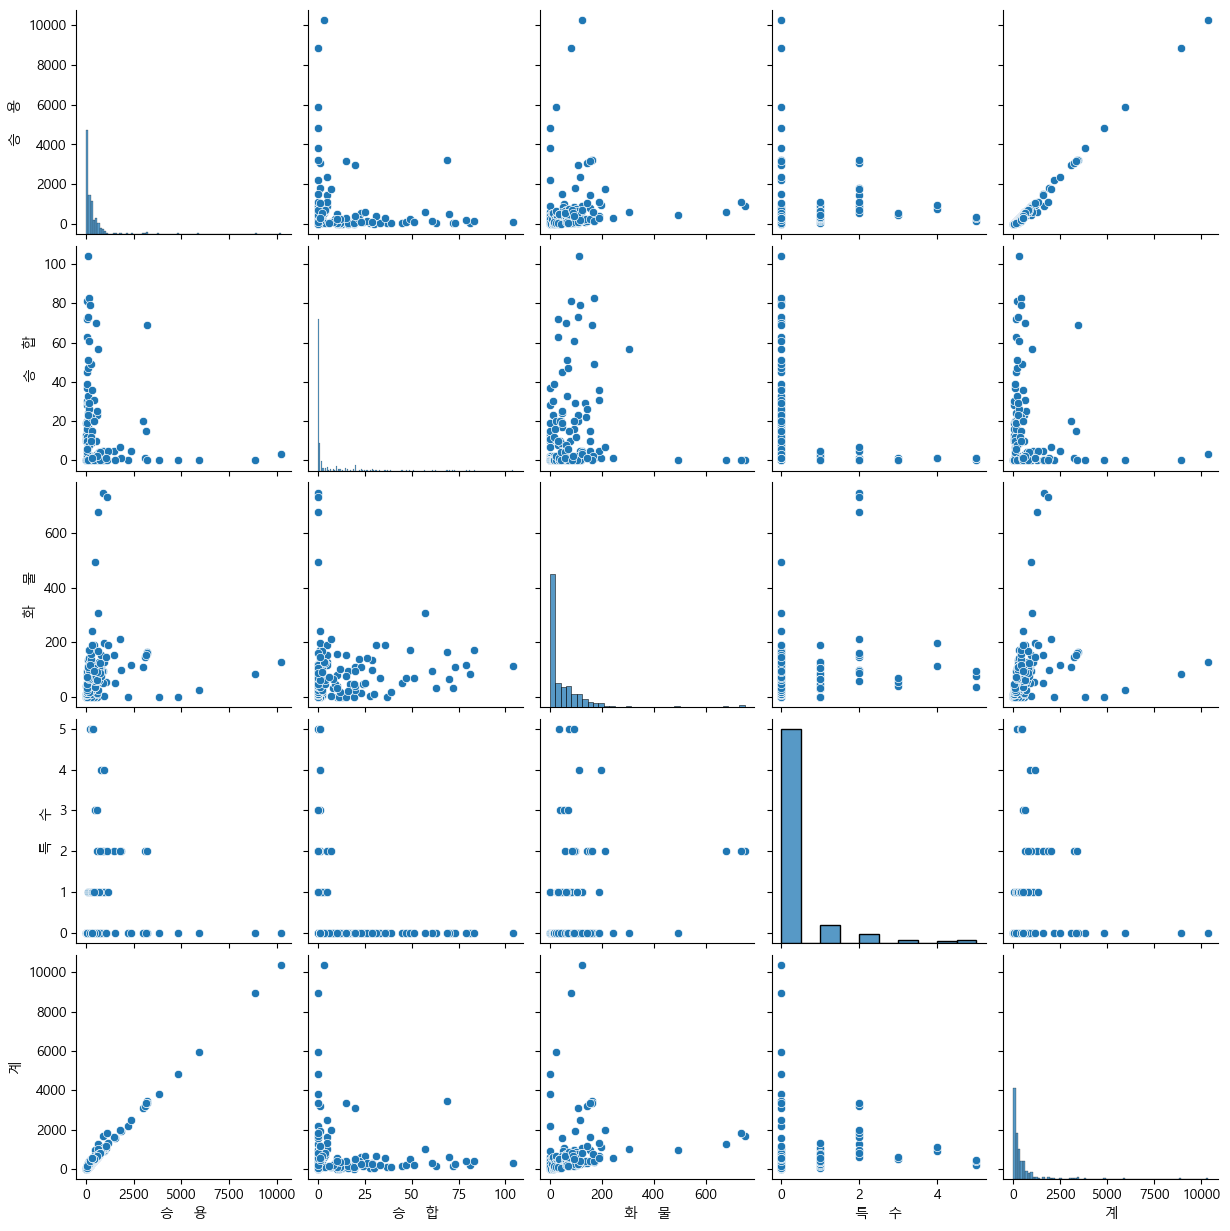

In [62]:
num_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features])

## <전기자동차의 용도를 구분하는 분류학습 시행>

In [63]:
y = df['용도별']

X = df.drop(['용도별','시군구별','연료별'],axis=1)

X.head()

,승 용,승 합,화 물,특 수,계,연도
0,73,0,2,0,75,2017
1,106,1,2,0,109,2017
2,1,0,0,0,1,2017
3,67,0,0,0,67,2017
4,85,0,1,0,86,2017


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.684931506849315
[[18 21]
 [ 2 32]]


In [66]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6712328767123288
[[36  3]
 [21 13]]


In [67]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8767123287671232
[[34  5]
 [ 4 30]]


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.9178082191780822
[[37  2]
 [ 4 30]]


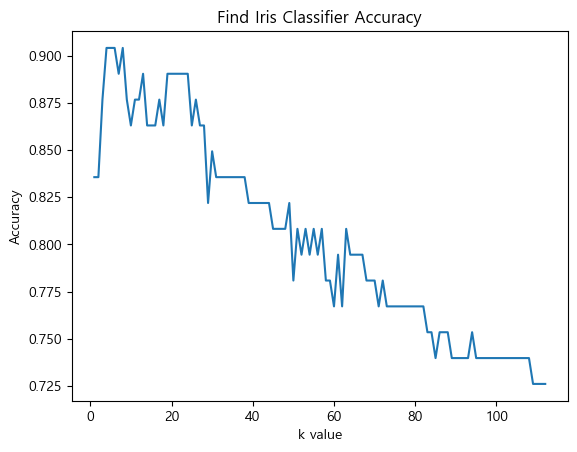

0.726027397260274


In [69]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Iris Classifier Accuracy")
plt.show()

print(find_model.score(X_test, y_test))

## <전기자동차 수의 증가를 회귀분석을 통해 예측>

In [70]:
y = df['계']

X = df.drop(['계','용도별','시군구별','연료별'],axis=1)

df.head()

,시군구별,연료별,용도별,승 용,승 합,화 물,특 수,계,연도
0,종로구,전기,비사업용,73,0,2,0,75,2017
1,중 구,전기,비사업용,106,1,2,0,109,2017
2,중 구,전기,사업용,1,0,0,0,1,2017
3,용산구,전기,비사업용,67,0,0,0,67,2017
4,성동구,전기,비사업용,85,0,1,0,86,2017


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [72]:
model = LinearRegression()

model.fit(X_train, y_train)

ly_preds = model.predict(X_test)

mse = np.sqrt(mean_squared_error(ly_preds, y_test))

print('평균제곱근오차', mse)

평균제곱근오차 5.311657726379897e-13
